This notebook examines the trend of total emissions from domestic use cars, the change in percentages of cars by 'fuel' type as well as the relationship between these two.

In [1]:
!pip install odfpy

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

file_path = 'stats.ods'
df = pd.read_excel(file_path, engine='odf')

# df.head()

In [3]:
df['Year'] = df['Date'].str.extract(r'(\d{4})').astype(int)

df = df.drop(columns=['Geography [note 3]', 'Units', 'BodyType', 'Date'])

cars = df.groupby('Year').sum()
cars = cars.reset_index()
cars
# print(cars.columns)

,Year,Petrol,Diesel,Hybrid electric (petrol),Hybrid electric (diesel),Plug-in hybrid electric (petrol),Plug-in hybrid electric (diesel),Battery electric
0,2014,64324.409,35396.494,606.141,22.249,14.119,0.689,33.718
1,2015,63729.591,37714.886,729.576,32.230,65.537,1.159,60.498
2,2016,63408.013,39968.576,887.220,37.918,146.917,2.266,91.739
3,2017,63272.484,41385.722,1097.249,39.524,242.061,4.445,129.652
4,2018,63473.696,41690.697,1356.248,38.676,364.649,5.756,174.810
5,2019,64514.604,41384.492,1680.658,38.322,474.907,7.504,258.297
6,2020,64439.910,40449.347,2067.825,67.330,626.466,13.916,509.500
7,2021,64276.557,39191.309,2768.398,164.897,946.306,28.041,1052.679
8,2022,64167.570,37838.195,3722.012,249.815,1289.147,39.032,1879.836
9,2023,64329.296,36253.803,4937.270,309.885,1667.402,39.409,2912.217


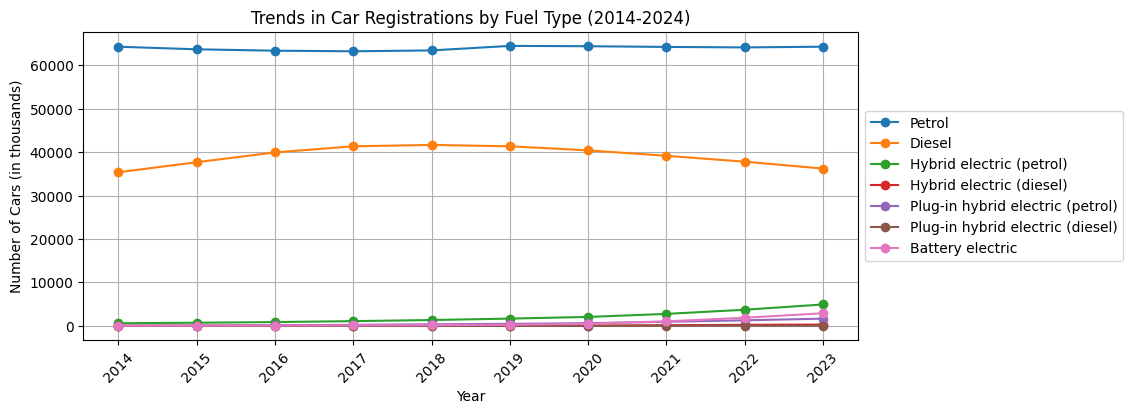

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 4))

for column in cars.columns[1:]:
    plt.plot(cars['Year'], cars[column], marker='o', label=column)

plt.title('Trends in Car Registrations by Fuel Type (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Cars (in thousands)')
plt.xticks(cars['Year'], rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

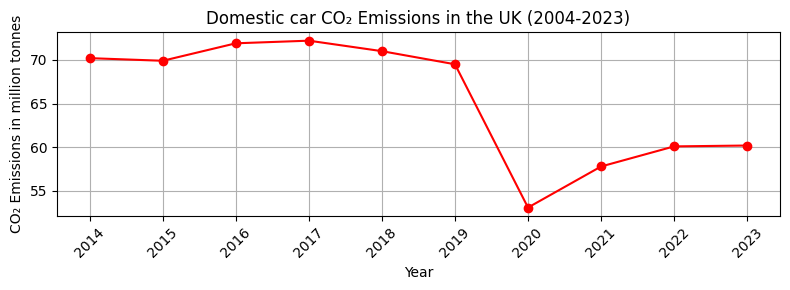

In [9]:
co2 = pd.read_excel(file_path, sheet_name=2, engine='odf')
co2['Year'] = co2['Year'].astype(int)
co2['CO2(mil.tonnes)'] = pd.to_numeric(co2['CO2(mil.tonnes)'], errors='coerce')

plt.figure(figsize=(8, 3))
plt.plot(co2['Year'], co2['CO2(mil.tonnes)'], marker='o', color='red', label='CO₂ Emissions')

plt.title('Domestic car CO₂ Emissions in the UK (2004-2023)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions in million tonnes')
plt.xticks(co2['Year'], rotation=45)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

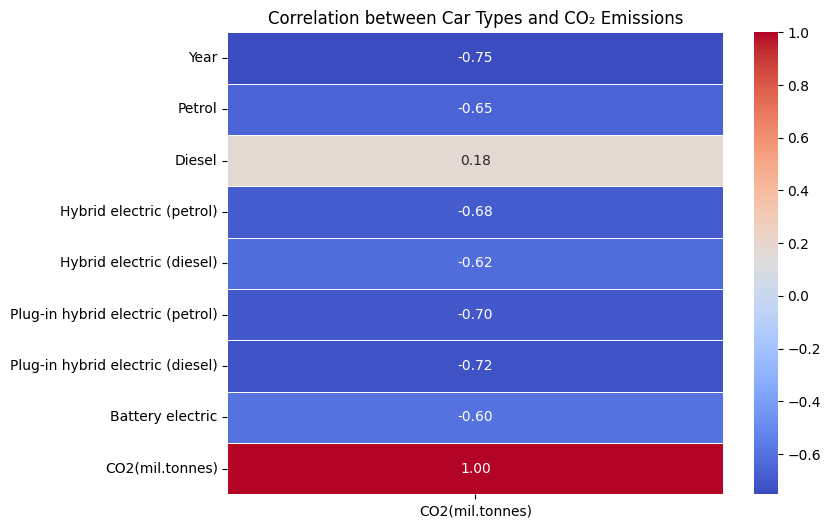

In [14]:

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the datasets again (if needed)
combined_data = cars.merge(co2, on='Year')

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Display the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['CO2(mil.tonnes)']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Car Types and CO₂ Emissions')
plt.show()

In [15]:
# Split the dataset into 'before' (2014-2018) and 'after' (2019-2024)
before_ev = combined_data[combined_data['Year'] < 2019]['CO2(mil.tonnes)']
after_ev = combined_data[combined_data['Year'] >= 2019]['CO2(mil.tonnes)']

# Perform a T-test
t_stat, p_value = stats.ttest_ind(before_ev, after_ev)

# Display the results
t_stat, p_value

(4.024031013927047, 0.003819656770103945)

Since the p-value is 0.0038, which is less than 0.05, we can conclude that there is a statistically significant difference in CO₂ emissions before and after the adoption of electric and hybrid vehicles.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select independent variables (car types) and dependent variable (CO2 emissions)
X = combined_data[['Petrol', 'Diesel', 'Hybrid electric (petrol)', 'Plug-in hybrid electric (petrol)', 'Battery electric']]
y = combined_data['CO2(mil.tonnes)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, mse, r2)

(2.1581941699452294, 4.668442995770258, 0.8055625574439711)

R² = 0.806 means the model explains about 80.6% of the variation in CO₂ emissions based on the number of cars of each fuel type. This is a strong indication that car type distribution significantly influences emissions.
The errors are reasonably low, suggesting good predictive accuracy.